In [1]:
import pandas as pd
from carga_datos import  columnas_ndvi
import matplotlib.pyplot as plt
import numpy as np
import ftfy
import geopandas as gpd
import json

green_spaces_data cargada


Cargar BDD

In [2]:
df_summer = pd.read_csv("green_spaces_data/summerNDVI_corregido.csv",  encoding='utf-8')
df_winter = pd.read_csv("green_spaces_data/winterNDVI_corregido.csv",  encoding='utf-8')

Seleccionar Region de Vaplaraíso y comunas del Área Metropolitana de Valparaíso

In [3]:
df_summer_valparaiso = df_summer.loc[df_summer["NOM_REG"] == "Valparaíso"]
df_winter_valparaiso = df_winter.loc[df_winter["NOM_REG"] == "Valparaíso"]

comunas_gran_valparaiso = ["Valparaíso", "Quilpué", "Concón", "Viña del Mar", "Villa Alemana"]

# Verano
df_summer_gran_valparaiso = df_summer.loc[df_summer["NOM_COM"].isin(comunas_gran_valparaiso)]

# Invierno
df_winter_gran_valparaiso = df_winter.loc[df_winter["NOM_COM"].isin(comunas_gran_valparaiso)]

## Mapa coroplético Región de Valparaíso
fuente: https://github.com/Carlos-Olivares/Mapa-Coropletico/blob/main/Mapa_Coropletico.ipynb

Creamos copias

In [4]:
df_summer_gran_valparaiso_copy = df_summer_gran_valparaiso.copy()
df_winter_gran_valparaiso_copy = df_winter_gran_valparaiso.copy()

Ordenamos columnas de NDVI por orden cronológico

In [5]:
def extraer_numero(columna):
    return int(columna.split('_')[0])

# Ordenamos las columnas
ordered_ndvi_columns = sorted(columnas_ndvi, key=extraer_numero)

# Summer
# Reorganizamos las columnas, primero las ordenadas NDVI y luego el resto de las columnas
df_summer_gran_valparaiso_copy = df_summer_gran_valparaiso_copy[ordered_ndvi_columns + [col for col in df_summer_gran_valparaiso_copy.columns if '_NDVI' not in col]]

# Winter
df_winter_gran_valparaiso_copy = df_winter_gran_valparaiso_copy[ordered_ndvi_columns + [col for col in df_winter_gran_valparaiso_copy.columns if '_NDVI' not in col]]

Cambiamos las etiquetas (0_NDVI por 2002_NDVI)

In [6]:
# Diccionario con etiquetas nuevas. Reempolaza 0_NDVI con 2002_NDVI
nueva_etiqueta_ndvi = {
    f"{i}_NDVI": f"{2002 + i}_NDVI" for i in range(21)  # De 0_NDVI (2002) a 20_NDVI (2022)
}

# Cambiamos etiqueta
df_summer_gran_valparaiso_copy.rename(columns=nueva_etiqueta_ndvi, inplace=True)
df_winter_gran_valparaiso_copy.rename(columns=nueva_etiqueta_ndvi, inplace=True)

Cargar imagen polígono

In [7]:
#Importar poligonos de comunas
shapefile = 'Poligonos//Comunas//comunas.shp'

#Leer shapefile con geopandas
gdf = gpd.read_file(shapefile, encoding='utf-8')[['codregion', 'Region', 'cod_comuna', 'Comuna', 'Provincia', 'geometry']]

#Filtramos solo RM
gdf = gdf[gdf['codregion'] == 5]

#Columnas de interés
gdf = gdf[['cod_comuna', 'Comuna', 'geometry']]

### Verano

In [9]:
# Unir los dos dataframes por el código de la comuna
df_summer_gran_valparaiso_merged = gdf.merge(df_summer_gran_valparaiso_copy, how='left', left_on='cod_comuna', right_on='COD_COMUNA')

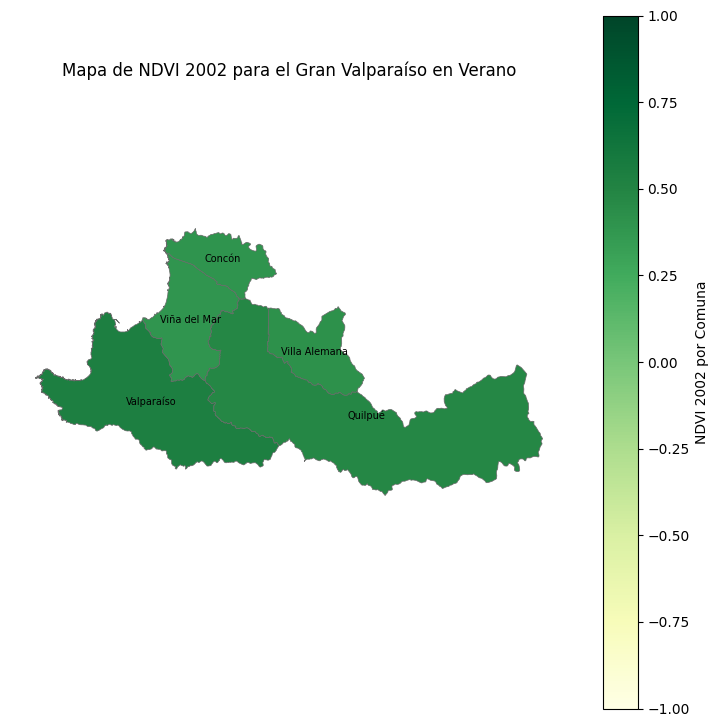

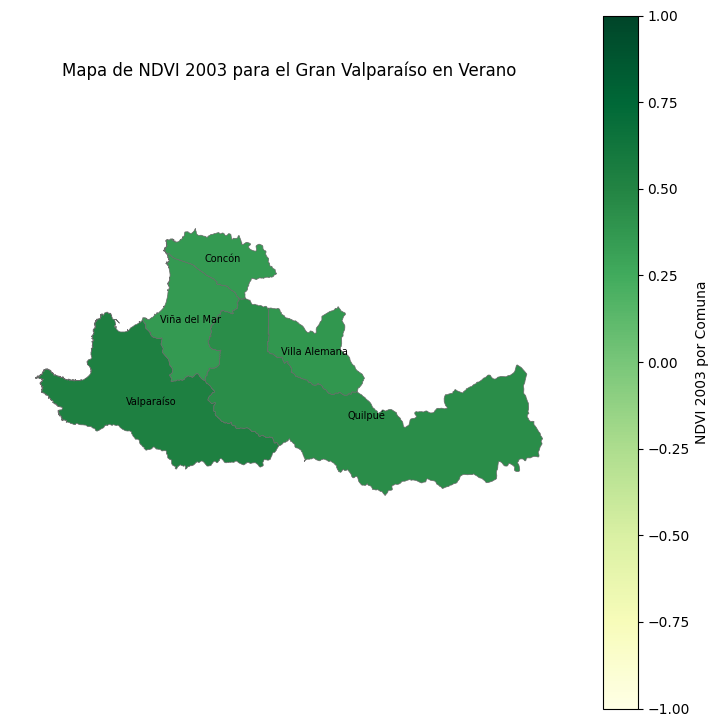

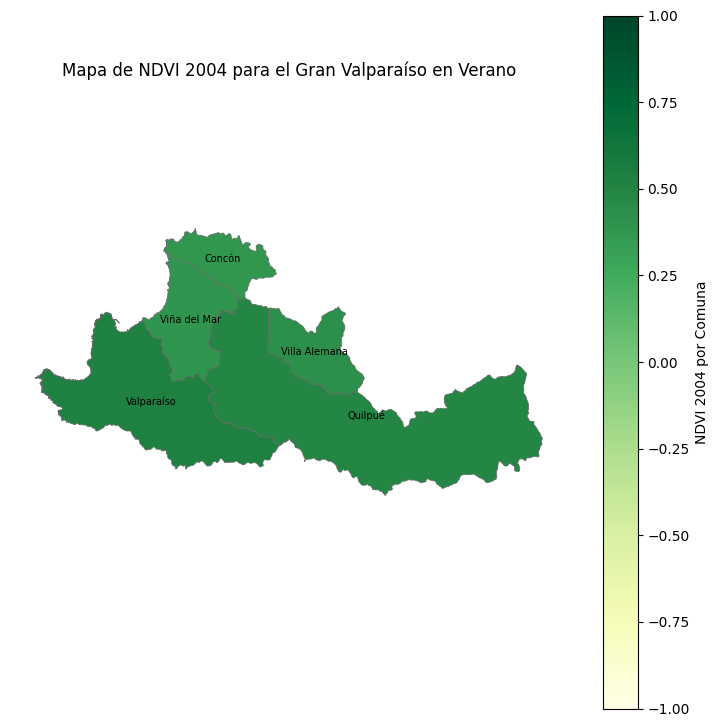

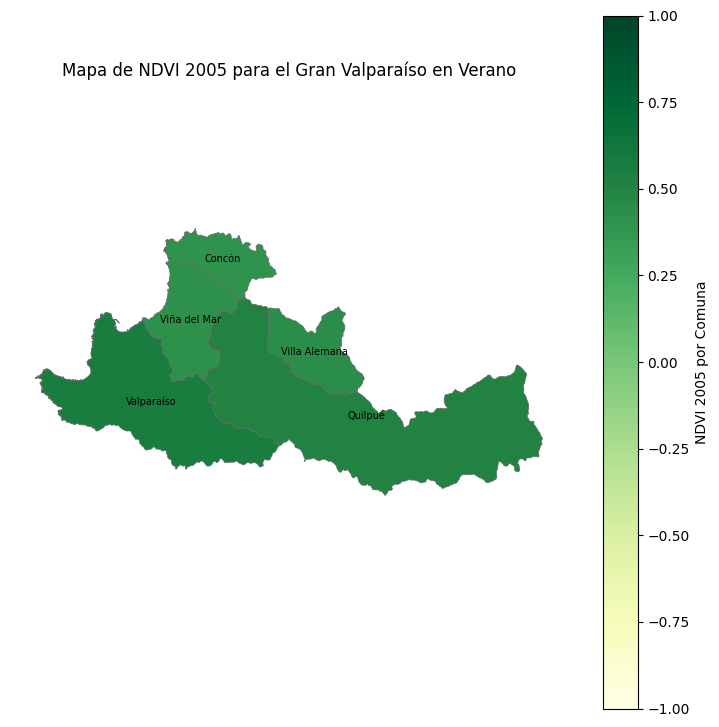

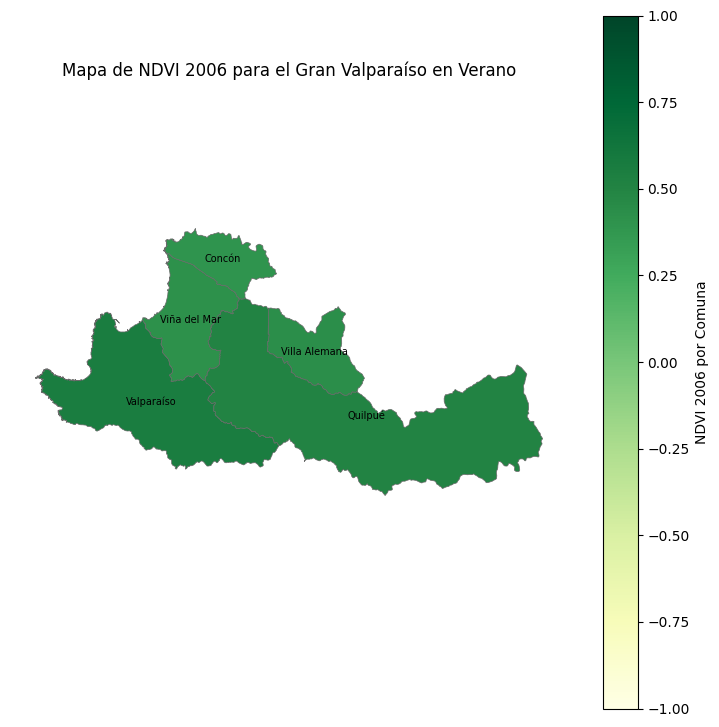

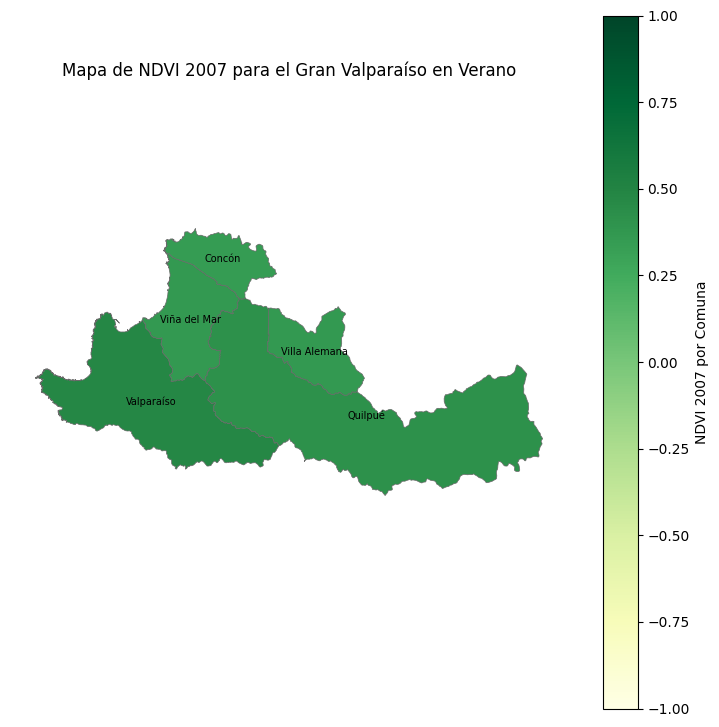

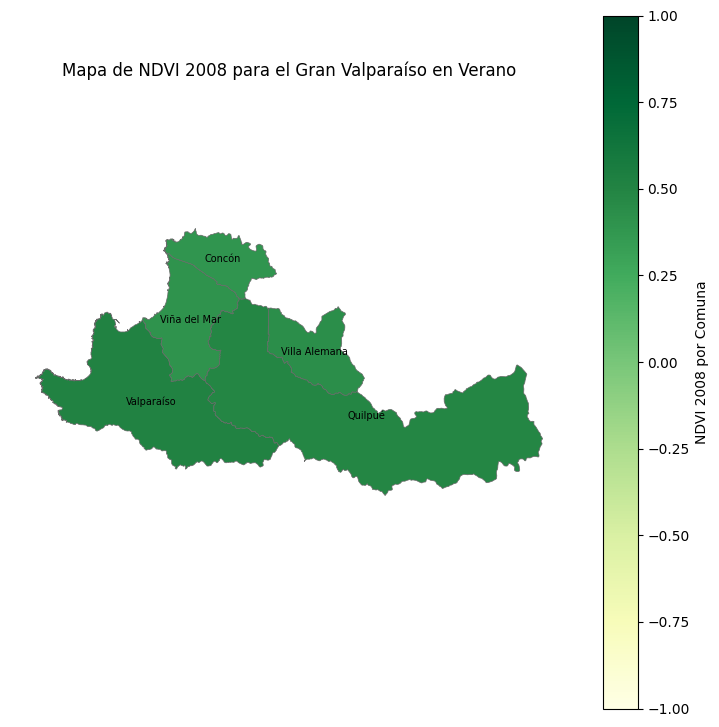

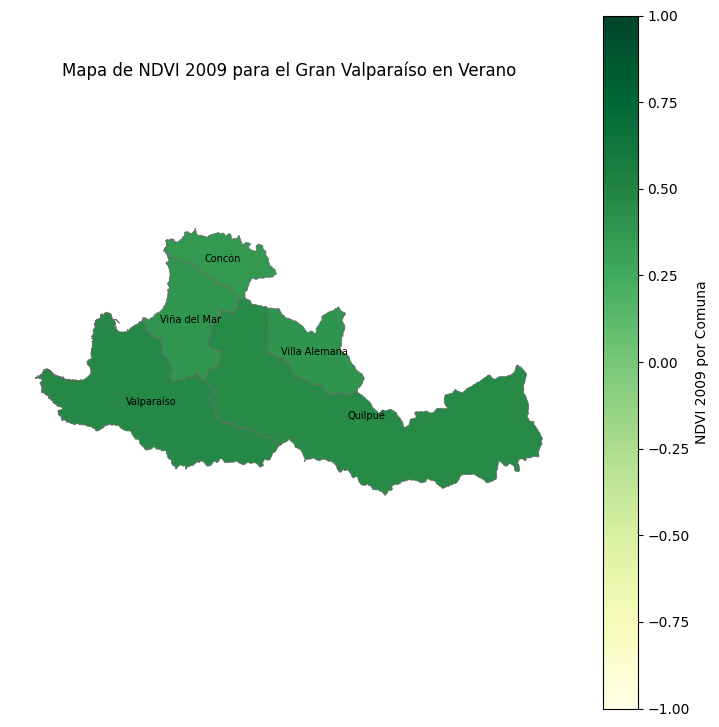

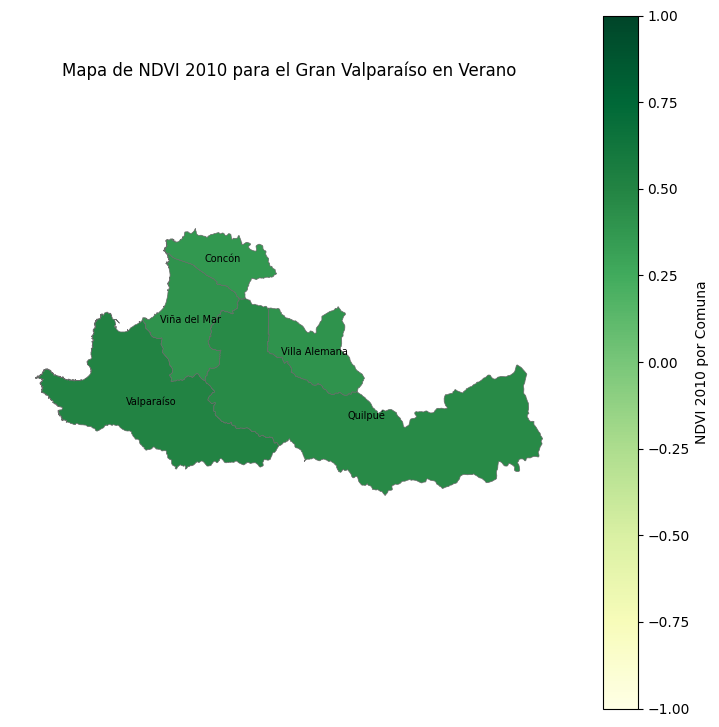

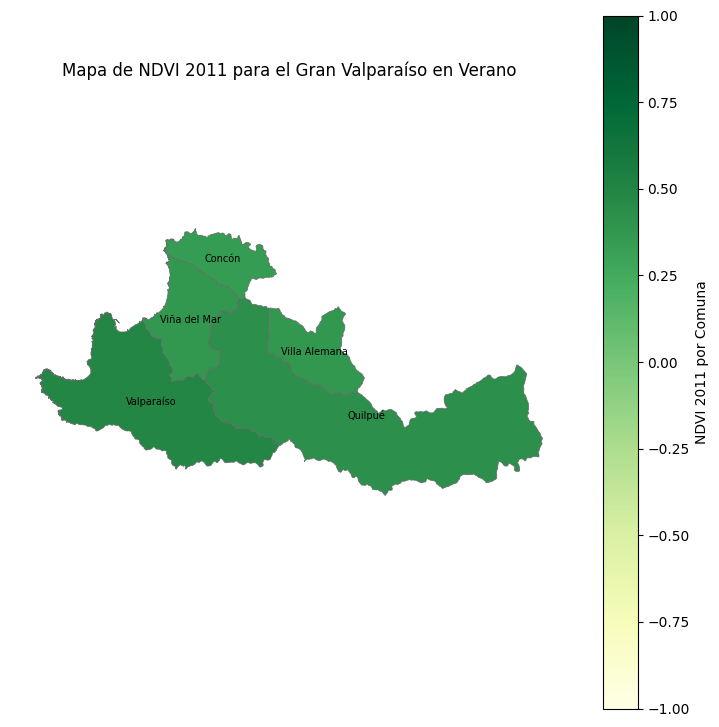

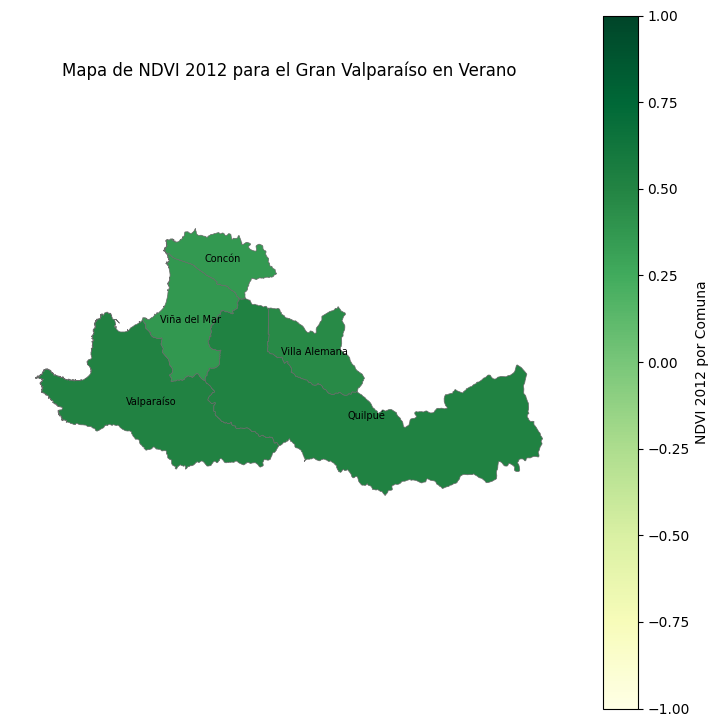

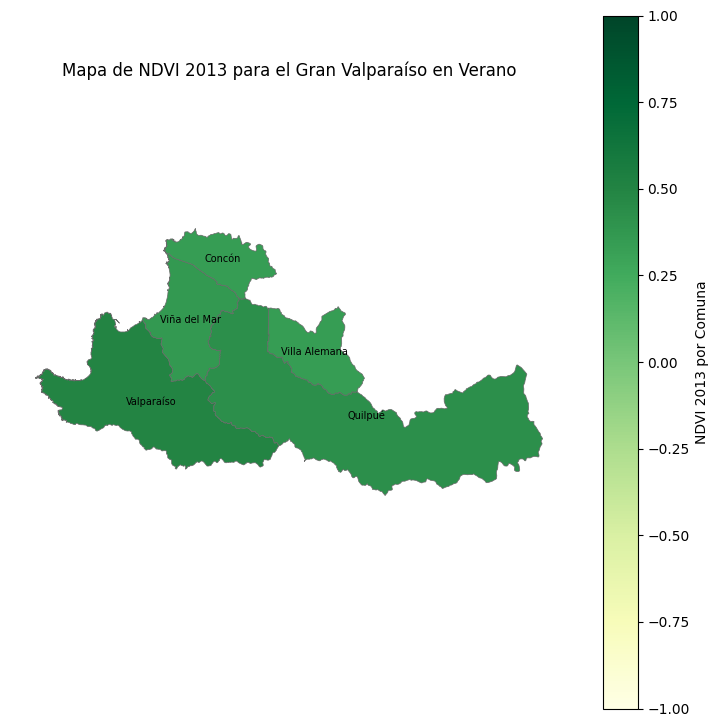

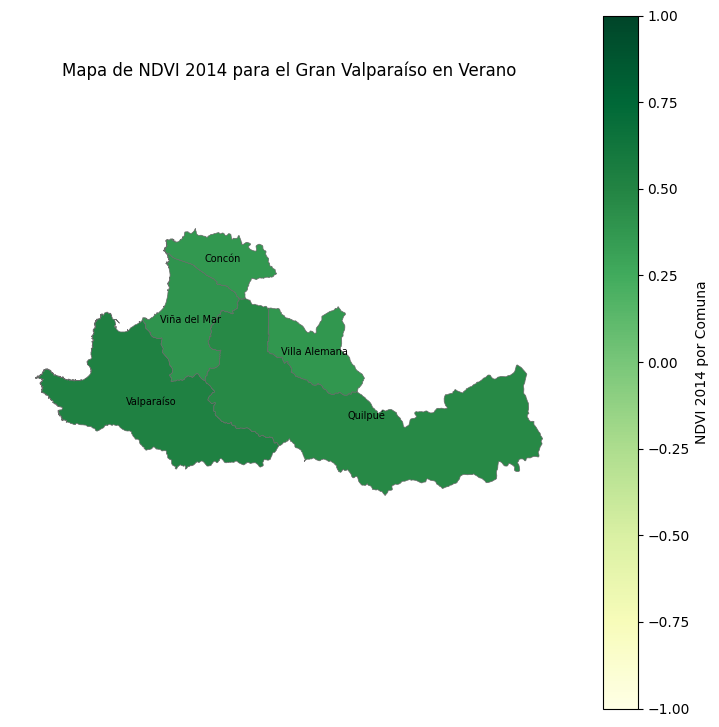

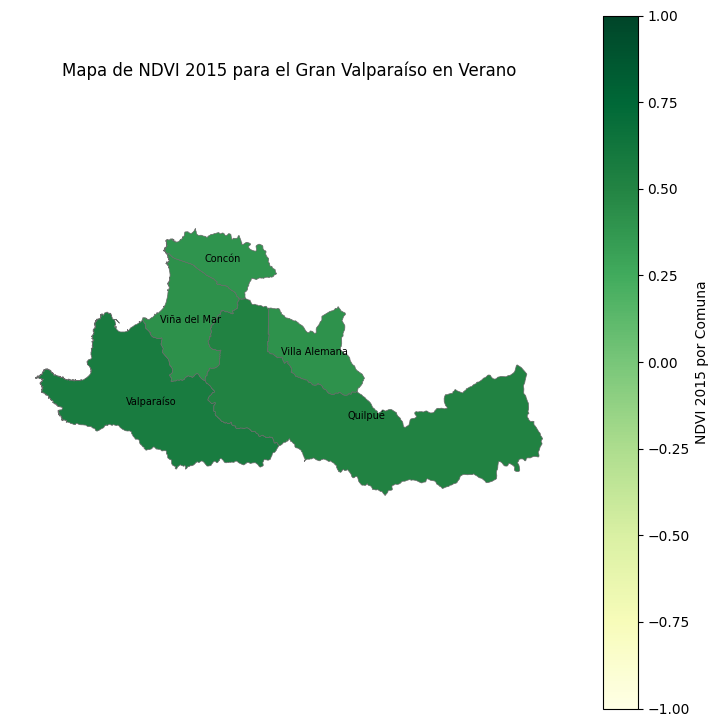

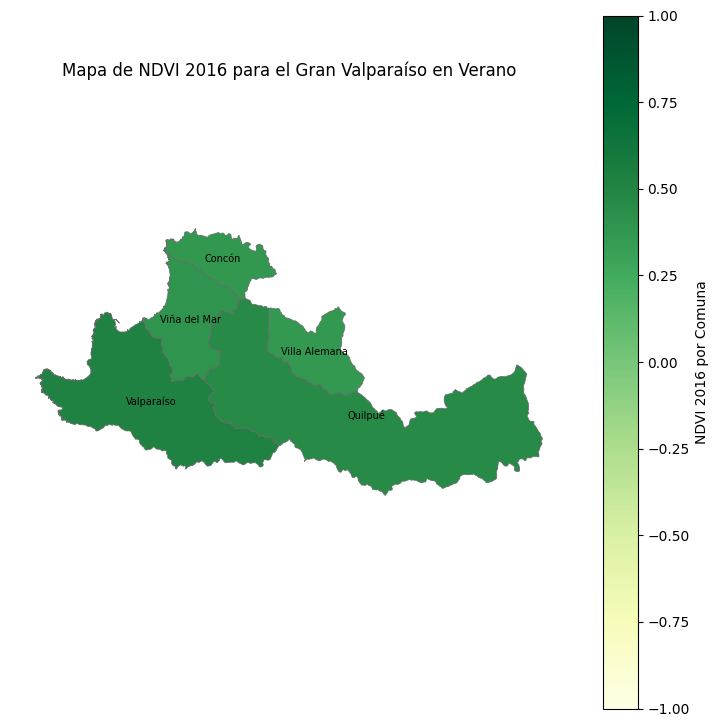

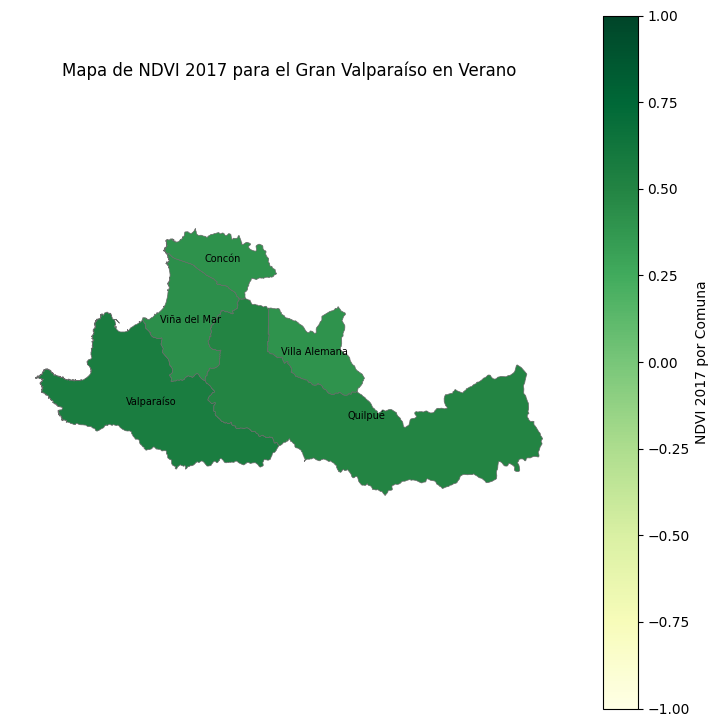

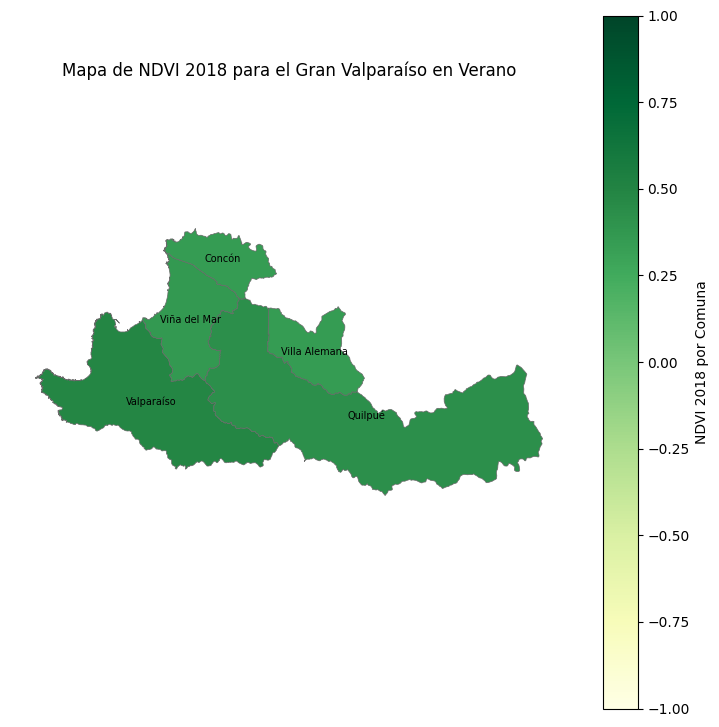

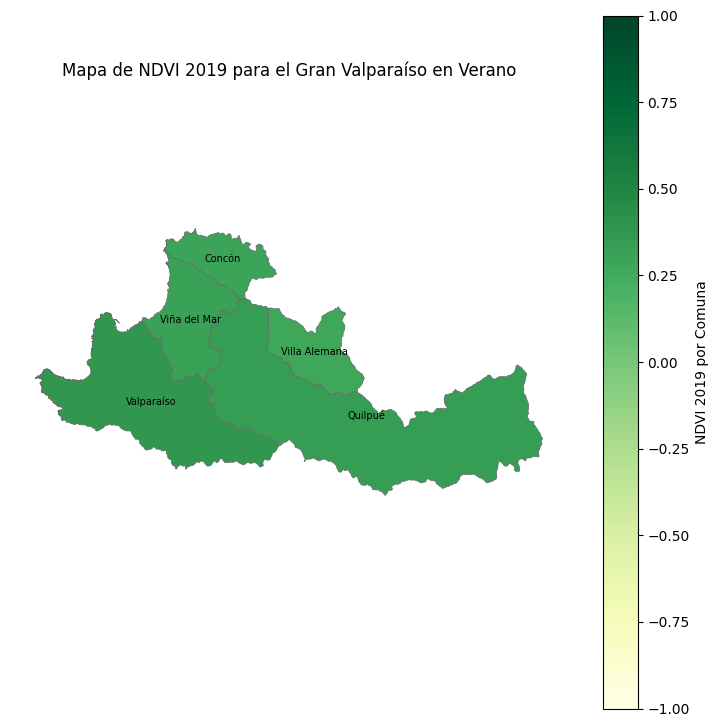

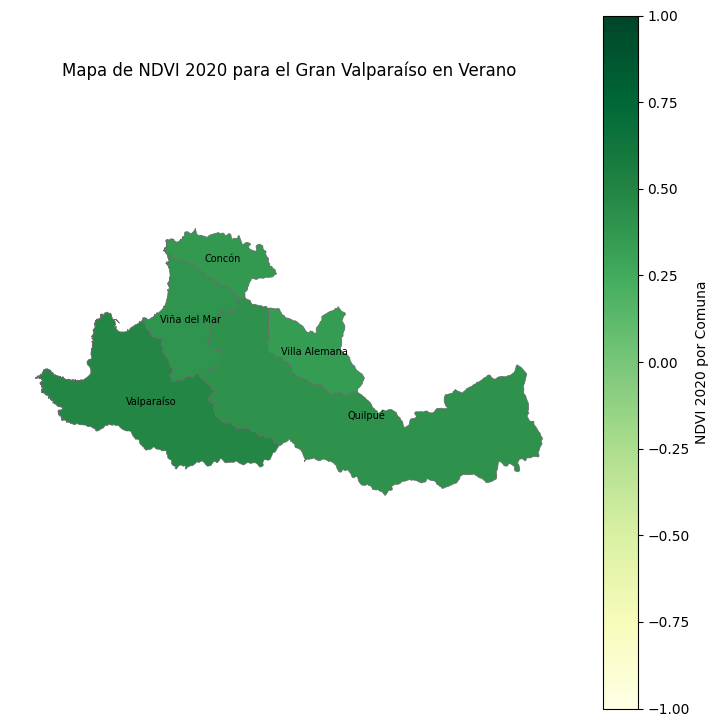

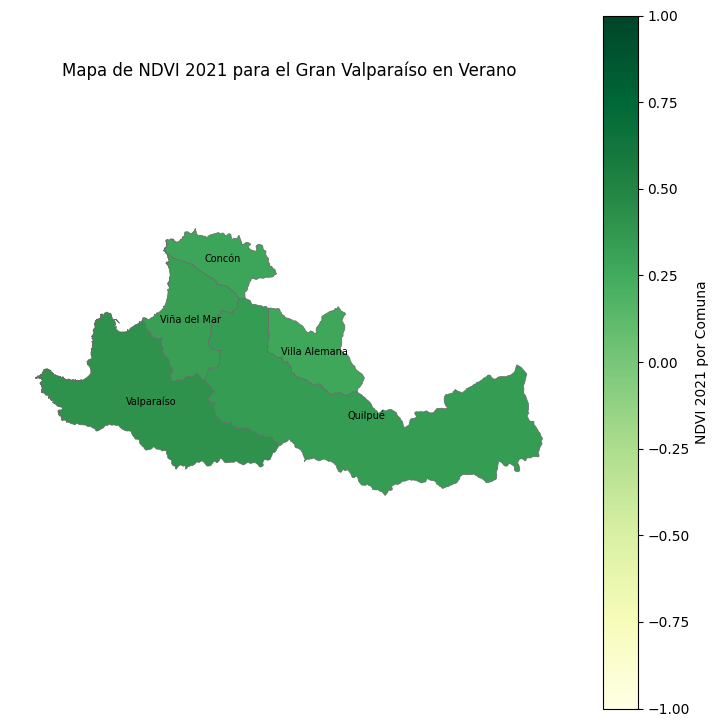

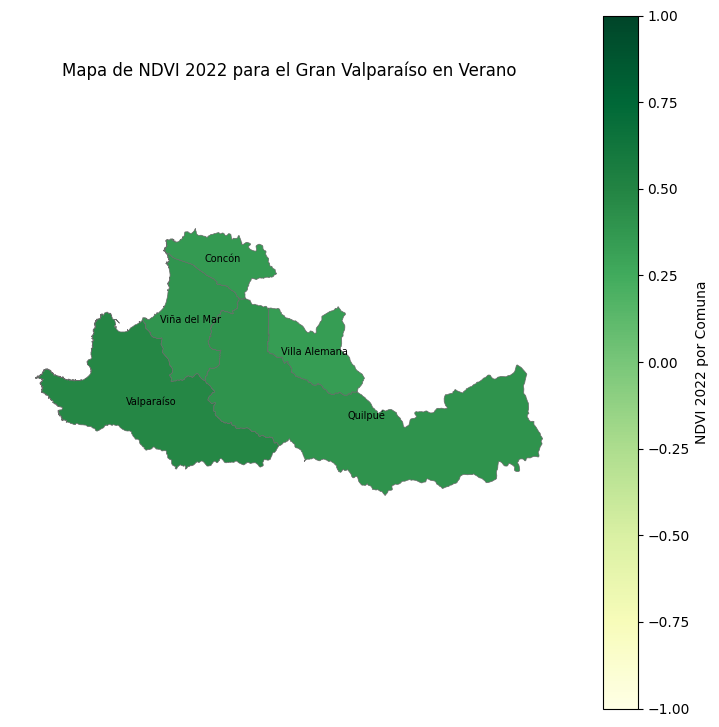

In [20]:
años = list(range(2002, 2023))

for año in años:
    df_summer_gran_valparaiso_merged_año = df_summer_gran_valparaiso_merged.dropna(subset=[f'{año}_NDVI'])
    df_summer_gran_valparaiso_merged_año.loc[:, f'{año}_NDVI'] = df_summer_gran_valparaiso_merged[f'{año}_NDVI'].fillna(0)

    # Crear la figura
    fig, ax = plt.subplots(1, 1, figsize=(9, 9))

    # Crear el mapa de NDVI
    df_summer_gran_valparaiso_merged_año.plot(column=f'{año}_NDVI', ax=ax, legend=True,
              legend_kwds={'label': f"NDVI {año} por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5, 
              vmin=-1, vmax=1) # valores mínimos y máximos de la barra de colores
    
    # Añadir etiquetas
    for i, row in df_summer_gran_valparaiso_merged_año.iterrows():
        x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
        label = f"{row['NOM_COM']}"
        ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550) 

    ax.set_axis_off()
    plt.title(f'Mapa de NDVI {año} para el Gran Valparaíso en Verano', pad=100)
    plt.show()

### Invierno

In [10]:
# Unir los dos dataframes por el código de la comuna
df_winter_gran_valparaiso_merged = gdf.merge(df_winter_gran_valparaiso_copy, how='left', left_on='cod_comuna', right_on='COD_COMUNA')

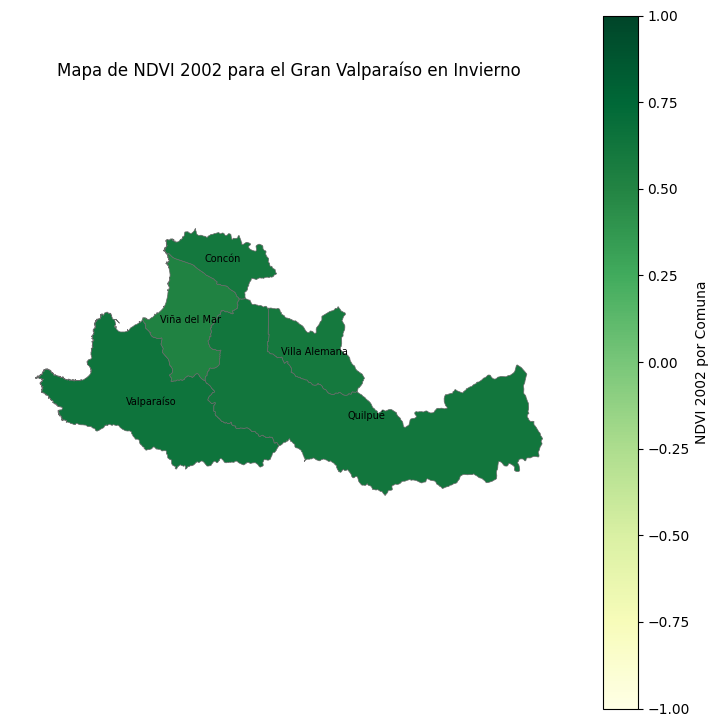

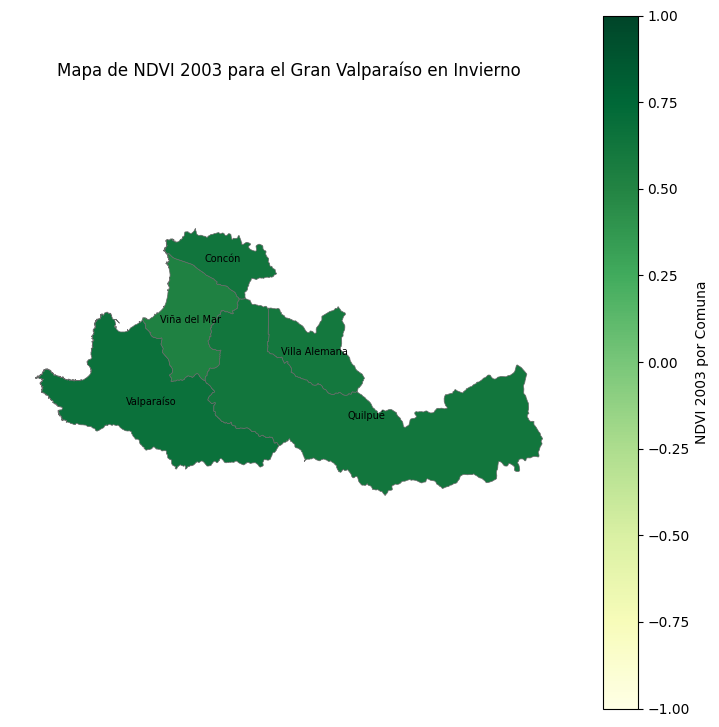

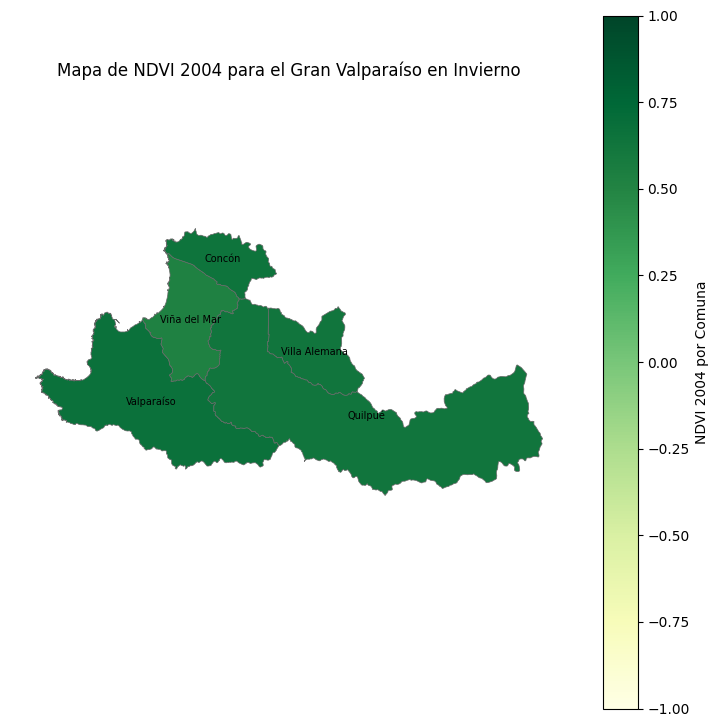

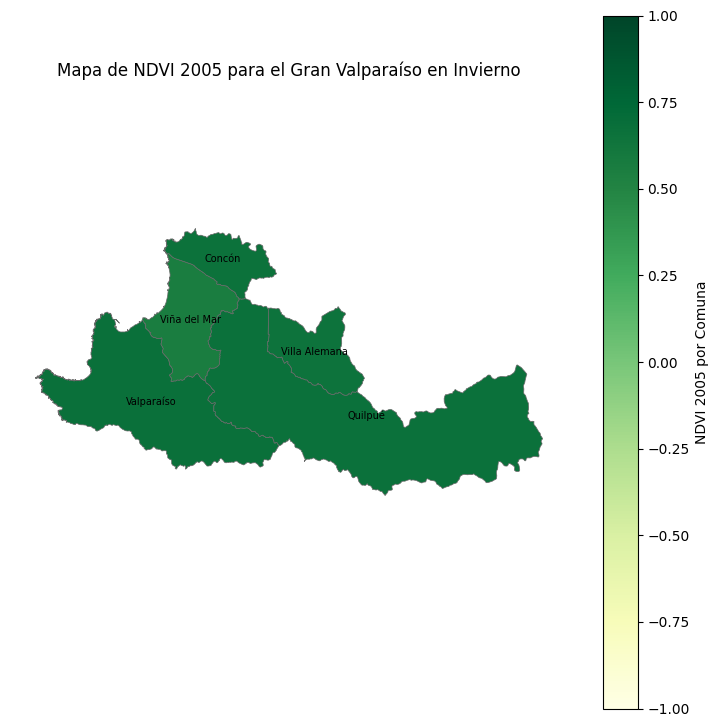

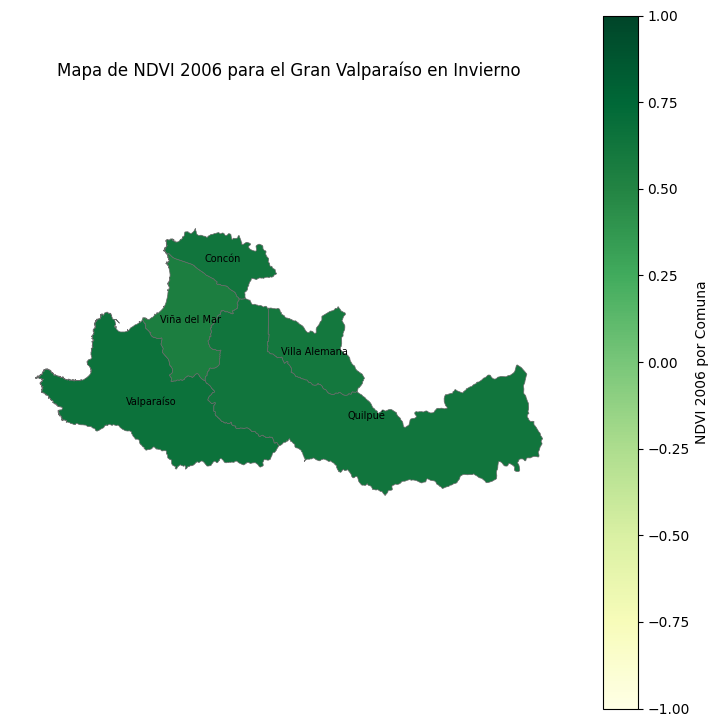

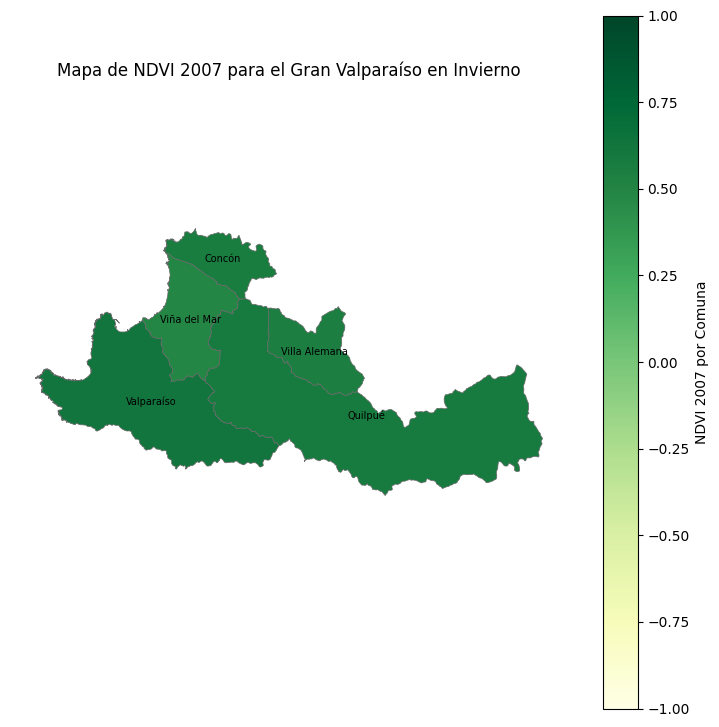

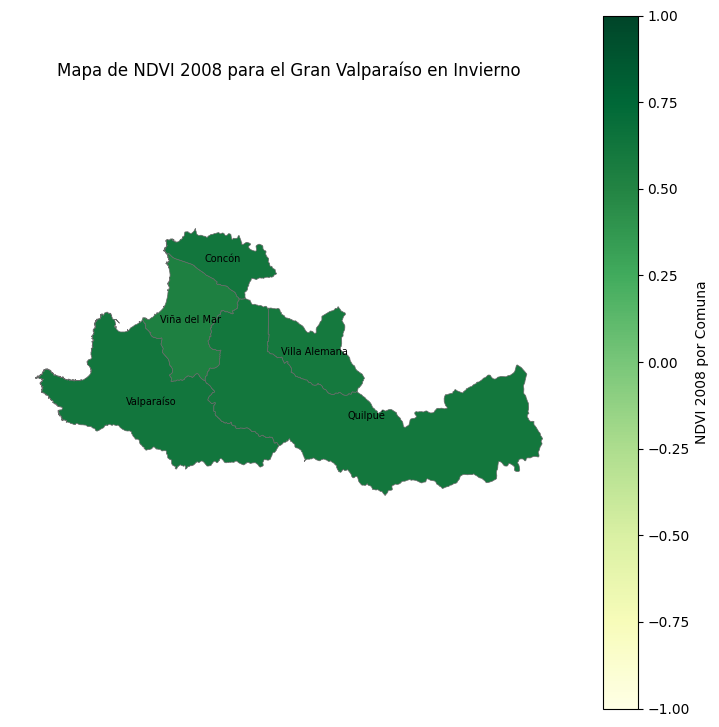

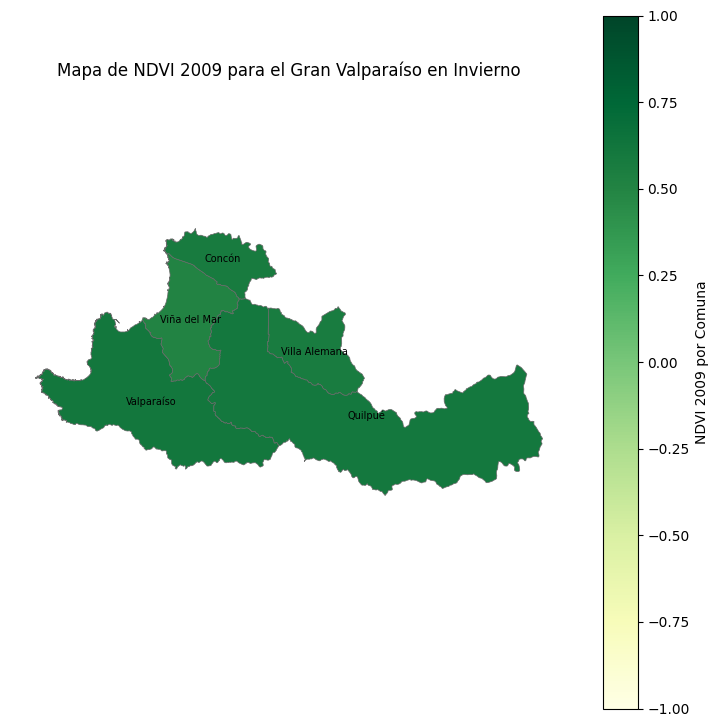

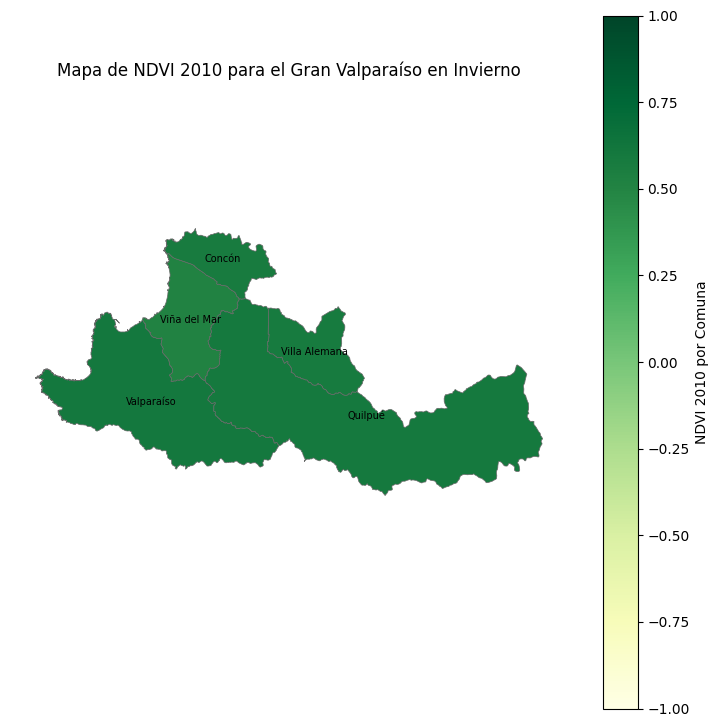

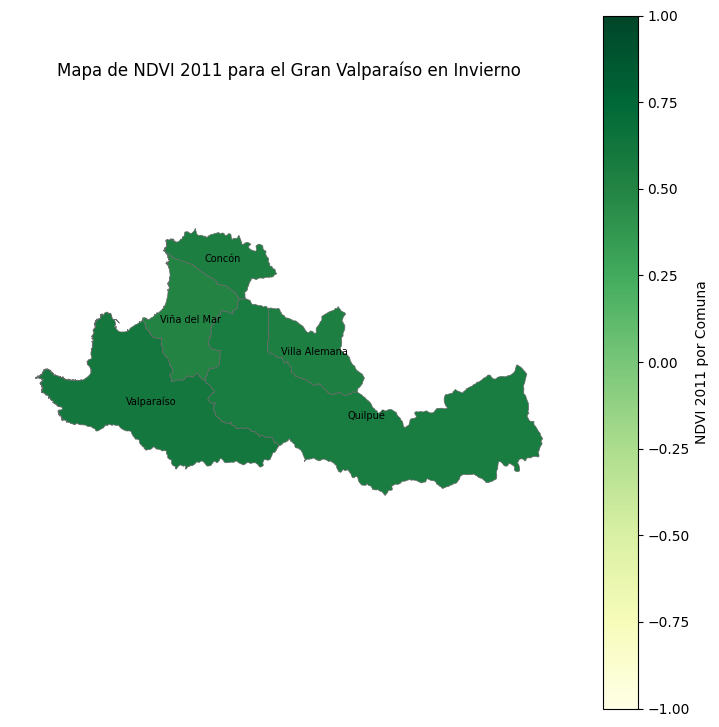

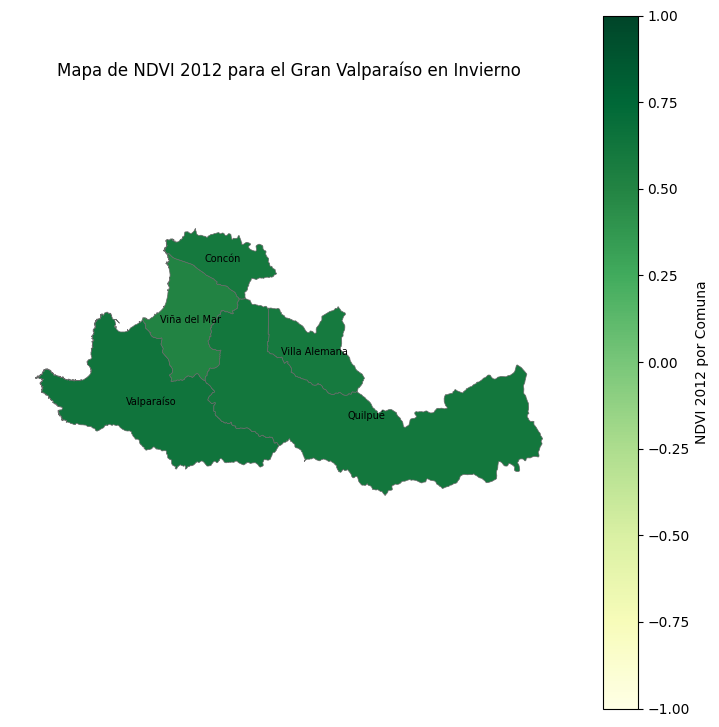

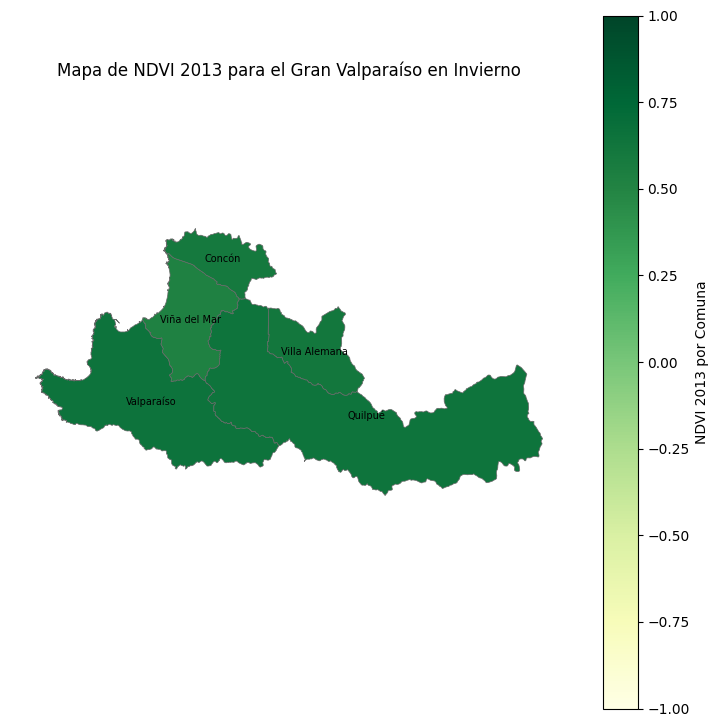

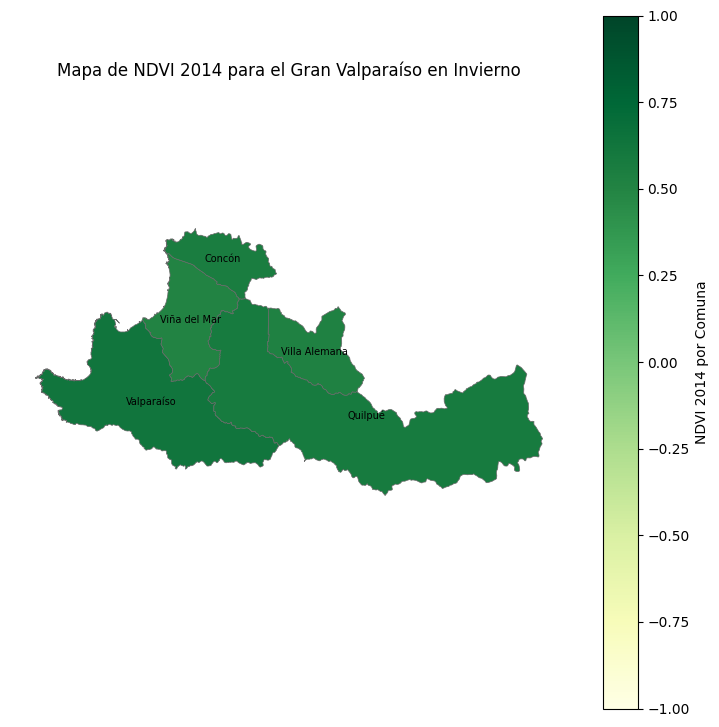

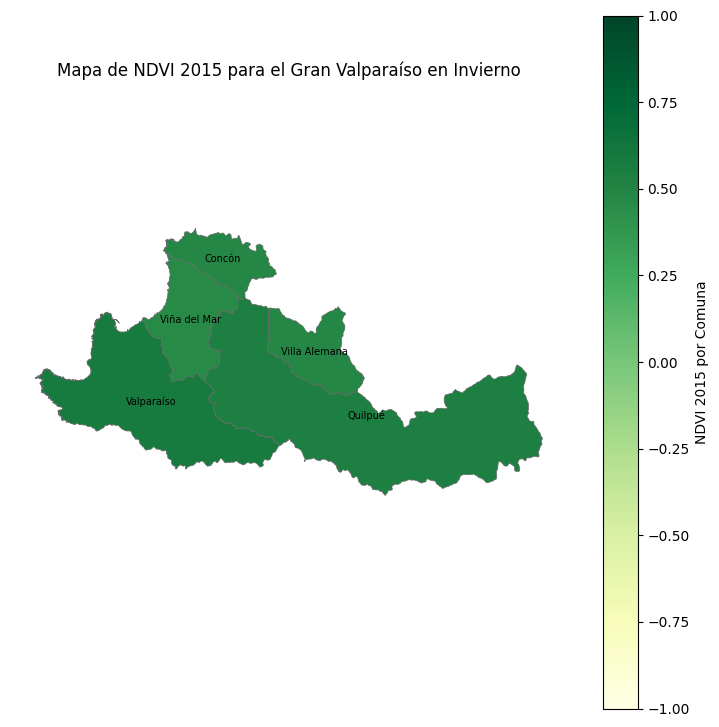

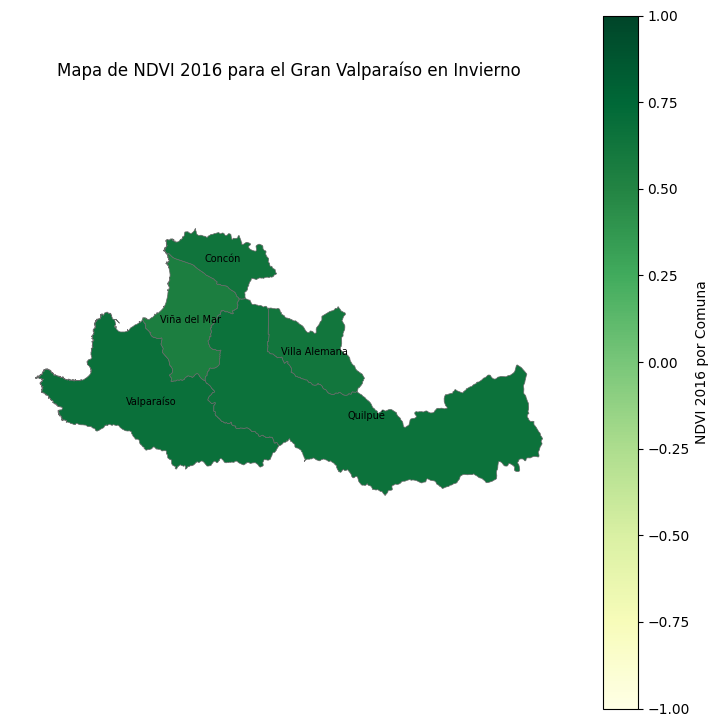

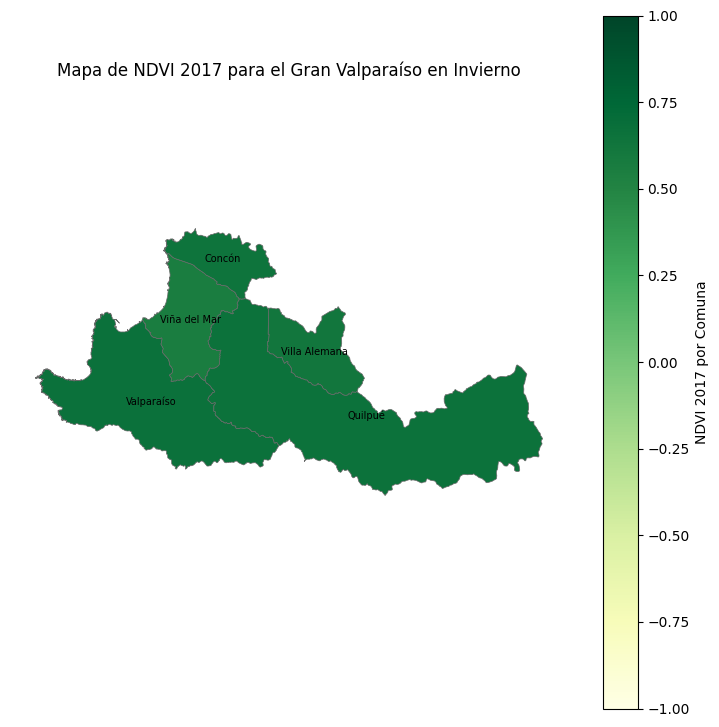

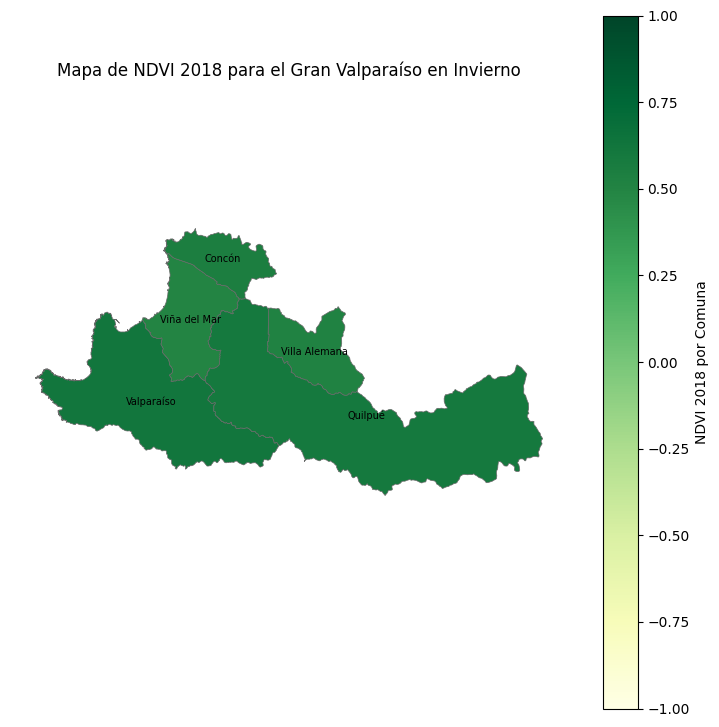

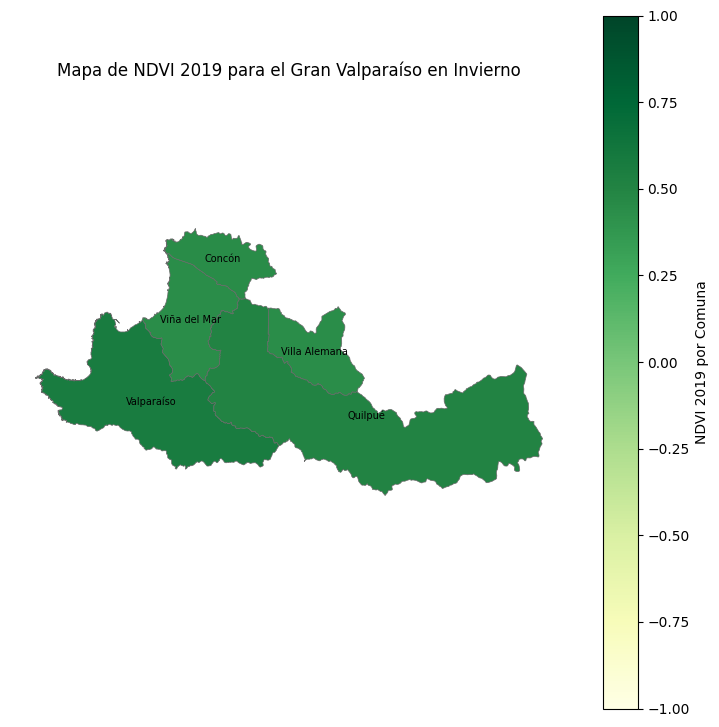

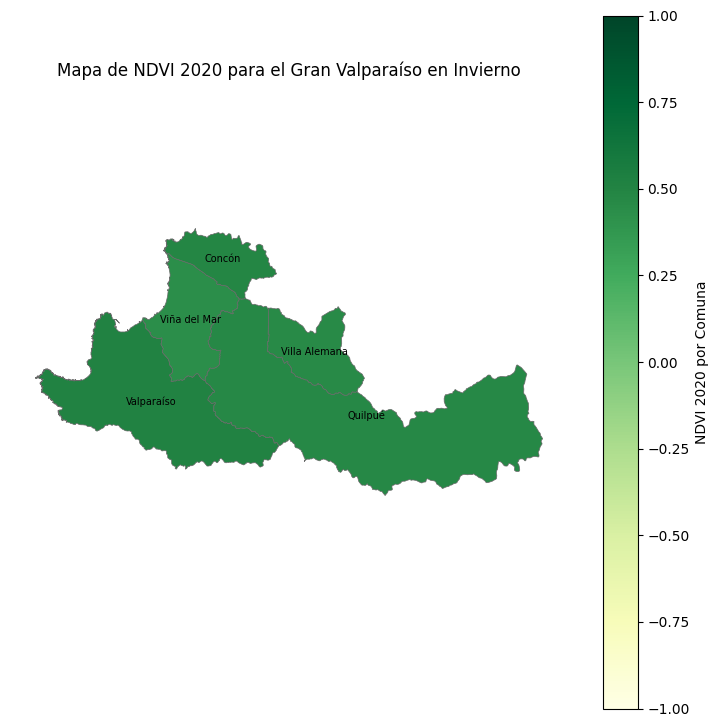

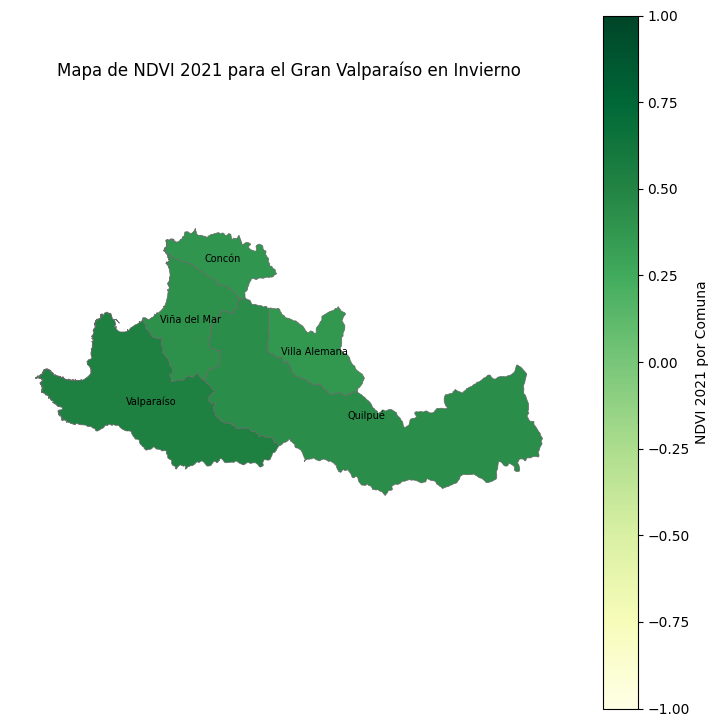

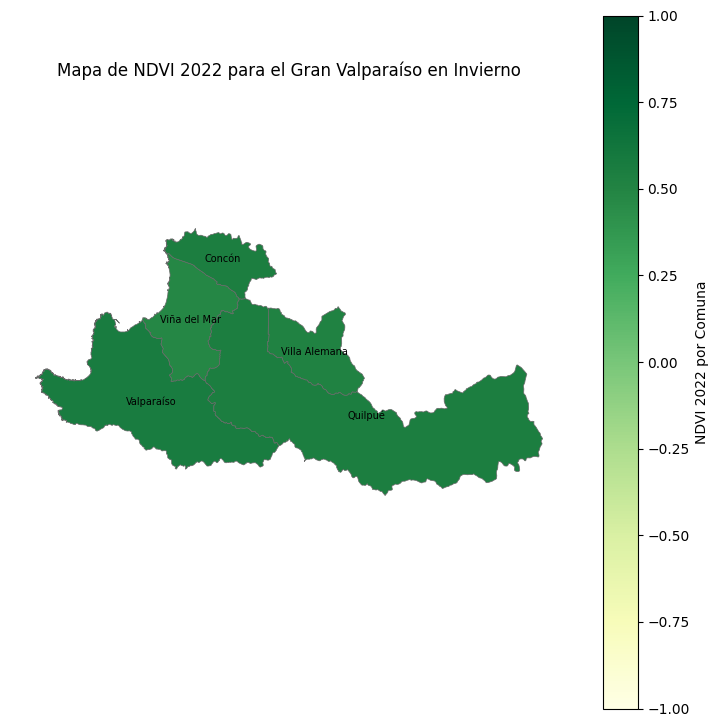

In [19]:
años = list(range(2002, 2023))

for año in años:
    df_winter_gran_valparaiso_merged_año = df_winter_gran_valparaiso_merged.dropna(subset=[f'{año}_NDVI'])
    df_winter_gran_valparaiso_merged_año.loc[:, f'{año}_NDVI'] = df_winter_gran_valparaiso_merged[f'{año}_NDVI'].fillna(0)

    # Crear la figura
    fig, ax = plt.subplots(1, 1, figsize=(9, 9))

    # Crear el mapa de NDVI
    df_winter_gran_valparaiso_merged_año.plot(column=f'{año}_NDVI', ax=ax, legend=True,
              legend_kwds={'label': f"NDVI {año} por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5, 
              vmin=-1, vmax=1) # valores mínimos y máximos de la barra de colores
    
    # Añadir etiquetas
    for i, row in df_winter_gran_valparaiso_merged_año.iterrows():
        x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
        label = f"{row['NOM_COM']}"
        ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550) 

    ax.set_axis_off()
    plt.title(f'Mapa de NDVI {año} para el Gran Valparaíso en Invierno', pad=100)
    plt.show()